In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [2]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [3]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 250, 
    mutation_rate = 0.05,
    max_tree_depth = 10,
)

In [4]:
dataset = load_diabetes()
X = dataset.data
y = dataset.target
X.shape, y.shape

((442, 10), (442,))

In [5]:
tester = tester(X, y, generator, 10, 1, X.shape[0], verbose = True, test_size = 0.2, random_state = 13)

Split:  0 Feature:  0
Iteration:  249 Best fitness:  0.3144019645608629 Generation best 0.286546610169491573
Split:  0 Feature:  1
Iteration:  249 Best fitness:  0.3568470724191063 Generation best 0.32884726502311246
Split:  0 Feature:  2
Iteration:  249 Best fitness:  0.3406201848998459 Generation best 0.27229391371340534
Split:  0 Feature:  3
Iteration:  249 Best fitness:  0.3604824730354391 Generation best 0.352850539291217244
Split:  0 Feature:  4
Iteration:  249 Best fitness:  0.3586286594761171 Generation best 0.31045358243451466
Split:  0 Feature:  5
Iteration:  249 Best fitness:  0.37598709553158705 Generation best 0.33652734976887526
Split:  0 Feature:  6
Iteration:  249 Best fitness:  0.32603043143297383 Generation best 0.31664098613251157
Split:  0 Feature:  7
Iteration:  249 Best fitness:  0.40184418335901384 Generation best 0.36481606317411397
Split:  0 Feature:  8
Iteration:  249 Best fitness:  0.37810573959938365 Generation best 0.36729583975346693
Split:  0 Feature:  9


In [6]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

10
9
10
9
8
10
10
10
10
10


In [7]:
tester.test_models(notests=50, show_iterations=10)

Iteration 9 - MSE 2971.9308111270957, R2 0.3939831495270234, MAE 42.10541468879329, NEW_MSE 3128.9319226369444, NEW_R2 0.3619685014195624, NEW_MAE 43.348304255925584
Iteration 19 - MSE 3062.7058382755686, R2 0.37547289489789437, MAE 42.94631183330673, NEW_MSE 3106.7090928033895, NEW_R2 0.3665000367076333, NEW_MAE 43.10002561881237
Iteration 29 - MSE 3032.673863451941, R2 0.38159682037016884, MAE 42.32570703095961, NEW_MSE 3061.2734179101685, NEW_R2 0.3757649847659166, NEW_MAE 43.026874689066105
Iteration 39 - MSE 2953.1842542534787, R2 0.39780582578557777, MAE 41.88696347393691, NEW_MSE 3060.88395097877, NEW_R2 0.37584440233588345, NEW_MAE 43.079929929906136
Iteration 49 - MSE 3069.7819191462377, R2 0.3740299863931339, MAE 42.49668728421861, NEW_MSE 3187.8716645207937, NEW_R2 0.34994989162877976, NEW_MAE 43.92220952358227
Iteration 9 - MSE 3162.0833102021816, R2 0.3552084855383465, MAE 45.600598662395704, NEW_MSE 3235.22029510362, NEW_R2 0.3402948660566567, NEW_MAE 45.959149612869126
I

In [8]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,3034.249622,0.381276,42.490845,3096.829735,0.368515,43.087179
1,SGDRegressor,3158.465952,0.355946,45.585810,3171.104830,0.353369,45.411836
2,GradientBoostingRegressor,5438.537935,-0.108991,54.027652,3763.095535,0.232654,47.114056


In [9]:
print(tester.get_tests().T.to_latex(index=False))  

\begin{tabular}{lll}
\toprule
                    0 &            1 &                         2 \\
\midrule
RandomForestRegressor & SGDRegressor & GradientBoostingRegressor \\
          3034.249622 &  3158.465952 &               5438.537935 \\
             0.381276 &     0.355946 &                 -0.108991 \\
            42.490845 &     45.58581 &                 54.027652 \\
          3096.829735 &   3171.10483 &               3763.095535 \\
             0.368515 &     0.353369 &                  0.232654 \\
            43.087179 &    45.411836 &                 47.114056 \\
\bottomrule
\end{tabular}



C:\Users\David Arcos\AppData\Local\Temp\ipykernel_9628\2462179699.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tester.get_tests().T.to_latex(index=False))


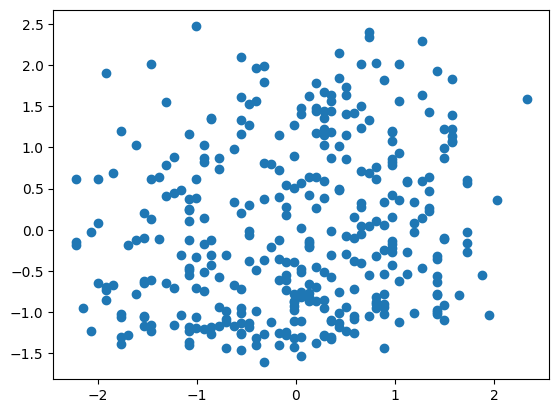

Min:  -2.2211338472651443 Max:  2.3302994813993063 Mean:  6.164411128230331e-17 Std:  1.0


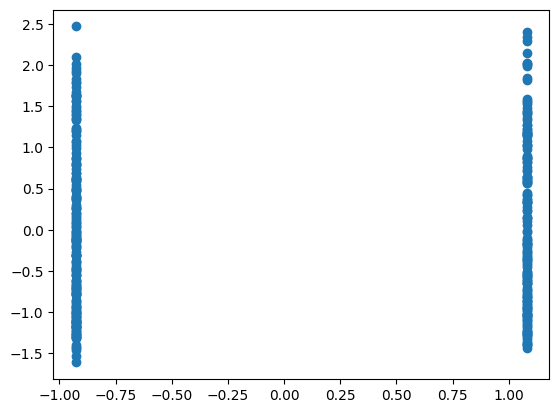

Min:  -0.9262260722102926 Max:  1.0796500228218142 Mean:  3.321233750720015e-16 Std:  1.0000000000000009


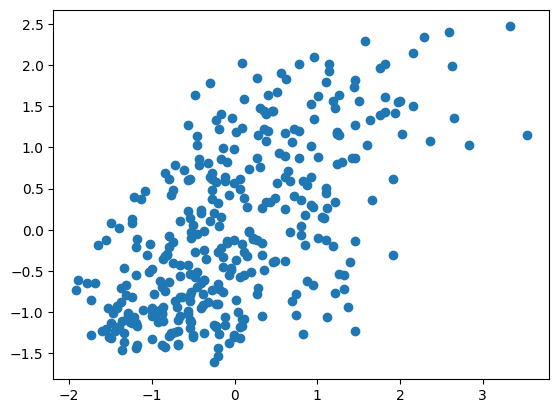

Min:  -1.9174932041558805 Max:  3.5326406989624117 Mean:  -1.0064344699151561e-17 Std:  0.9999999999999998


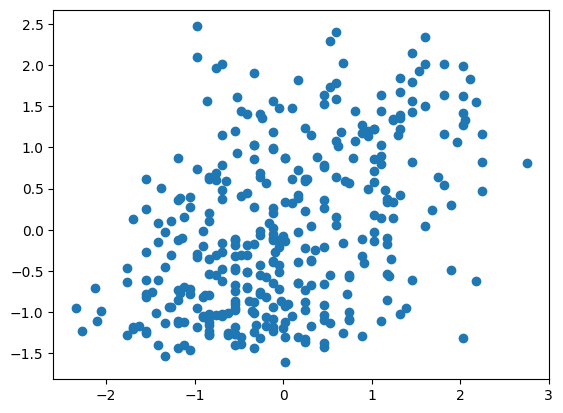

Min:  -2.3393062200092465 Max:  2.751586686529699 Mean:  2.5160861747878902e-17 Std:  0.9999999999999997


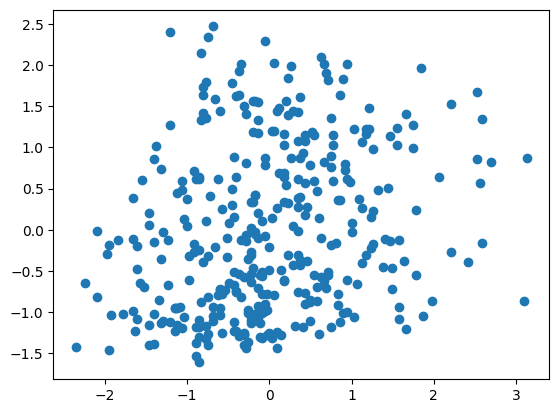

Min:  -2.3514585704910695 Max:  3.1315914450102063 Mean:  -3.0193034097454685e-17 Std:  1.0


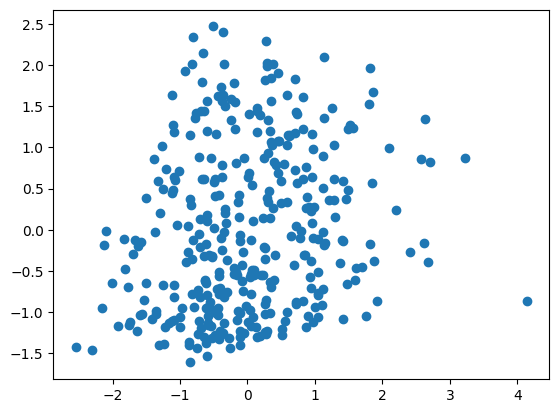

Min:  -2.5432155122389166 Max:  4.140824191904701 Mean:  2.767694792266679e-17 Std:  0.9999999999999993


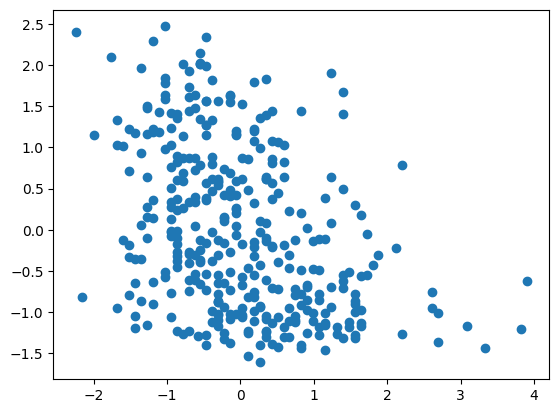

Min:  -2.24147428928296 Max:  3.9018849826058126 Mean:  -5.0321723495757804e-17 Std:  1.0000000000000007


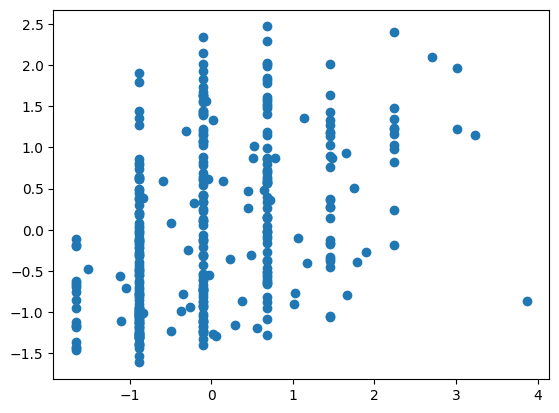

Min:  -1.6580007483373784 Max:  3.8669097565640835 Mean:  1.993998293519403e-16 Std:  1.000000000000001


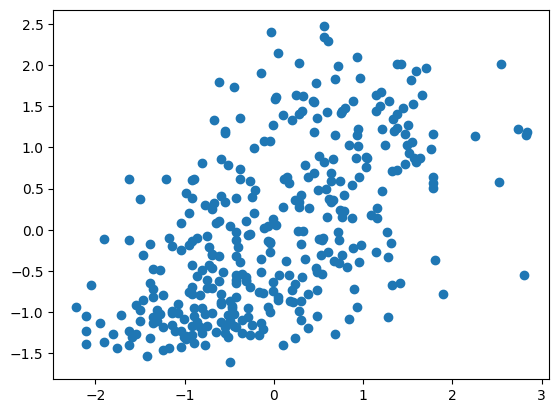

Min:  -2.2189285353791526 Max:  2.8333099089582676 Mean:  0.0 Std:  0.9999999999999996


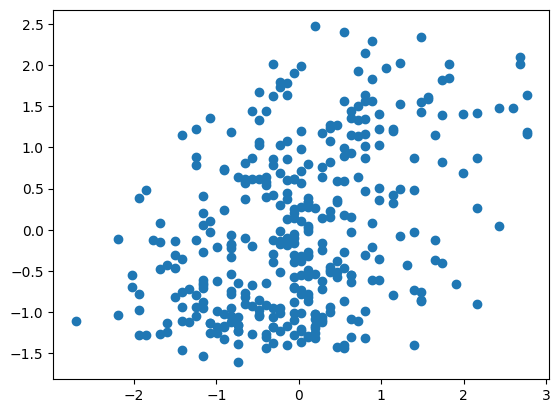

Min:  -2.706161676459996 Max:  2.76672388388234 Mean:  -8.051475759321249e-17 Std:  1.0000000000000004


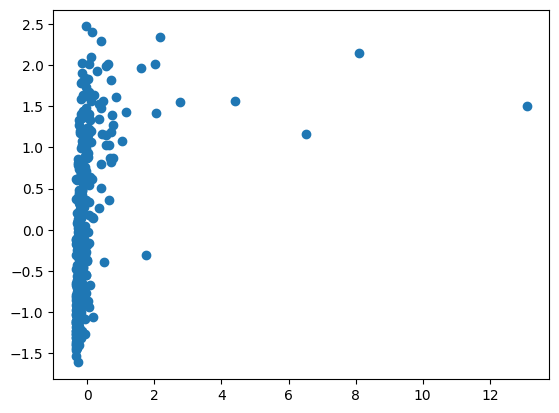

Min:  -0.3383989464570413 Max:  13.103176405766181 Mean:  -1.1573996404024295e-16 Std:  1.0


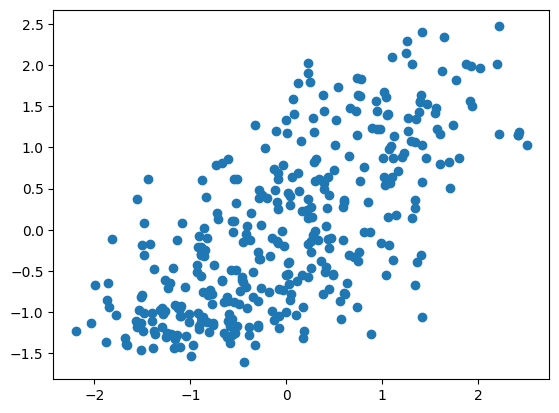

Min:  -2.193182673903498 Max:  2.5076784906790426 Mean:  3.904965743270806e-15 Std:  0.9999999999999998


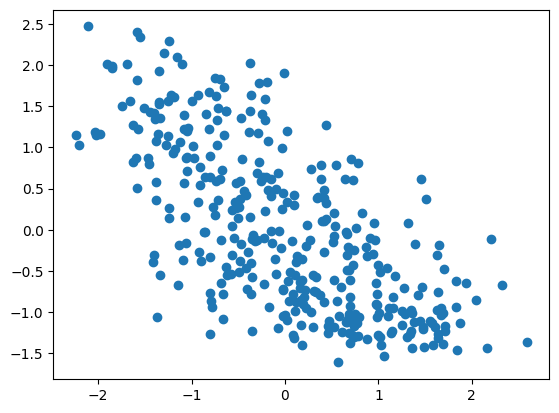

Min:  -2.238399815024585 Max:  2.5889297498301636 Mean:  -8.119410086040521e-15 Std:  1.0


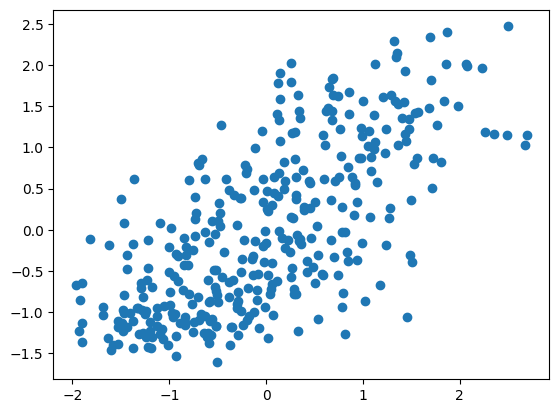

Min:  -1.9649291391569932 Max:  2.692973800459454 Mean:  5.001979315478326e-15 Std:  1.0000000000000004


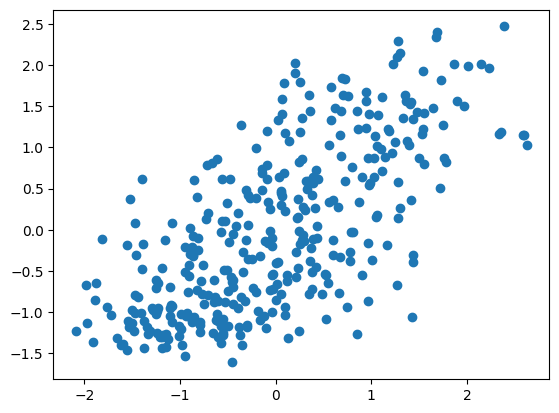

Min:  -2.0881064051095883 Max:  2.6258597065697846 Mean:  2.5160861747878902e-17 Std:  1.0000000000000002


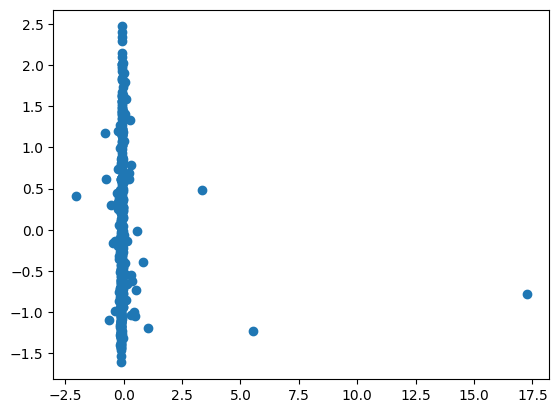

Min:  -2.041741057448579 Max:  17.25756971677917 Mean:  4.528955114618202e-17 Std:  1.0000000000000009


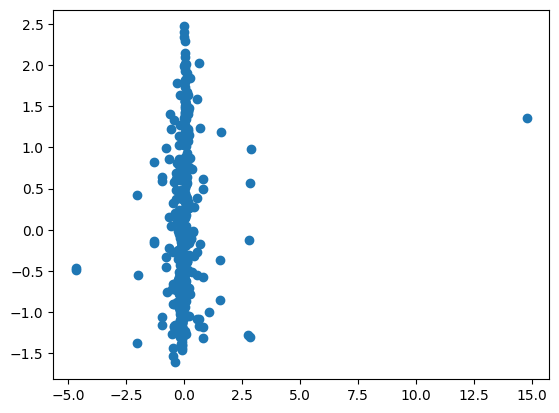

Min:  -4.665365101063972 Max:  14.794466274835061 Mean:  1.0064344699151561e-17 Std:  1.0000000000000002


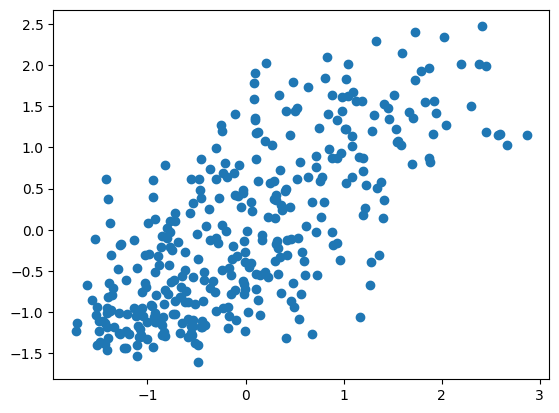

Min:  -1.7293627656448092 Max:  2.8679337610327926 Mean:  3.7527425296961385e-15 Std:  1.0000000000000002


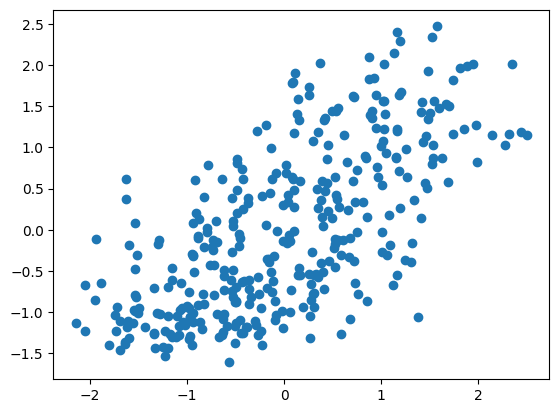

Min:  -2.1439805976779898 Max:  2.5012125815557393 Mean:  3.550197592625713e-15 Std:  1.0


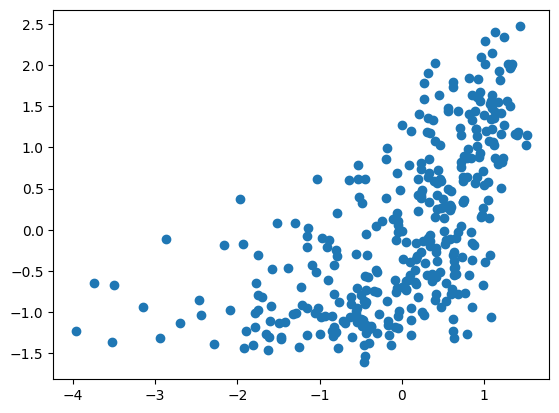

Min:  -3.9641075781095974 Max:  1.5206529429675026 Mean:  3.2205903037284996e-16 Std:  0.9999999999999998


In [10]:
for i in range(tester.new_X_train.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_train[:, i], tester.y_train)
    plt.show()
    print("Min: ", tester.new_X_train[:, i].min(), "Max: ", tester.new_X_train[:, i].max(), "Mean: ", tester.new_X_train[:, i].mean(), "Std: ", tester.new_X_train[:, i].std())
    